# Example 1: Loading Data
First we import the necessary modules

In [9]:
import torch
from pythermondt.readers import LocalReader, HDF5Parser

Next we create a reader object, for accessing DataContainers. In pyThermoNDT a reader does 2 things:
1. It reads the data from the specified source ==> This is done by the **reader classes**
2. It parses the data into a DataContainer object ==> This is done by the **parser classes**

Normally you do not have the worry about this distinction, because the reader classes automatically try the select the correct parser based on the file extension. If no parser is found, the reader will raise an error Optionally you can also specify the parser class explicitly.

In this example we want to read HDF5 files from example folder on the local disk. Therefore we use a **LocalReader** and specify the source expession + file extension. 

**Note1:** The source expression is a string that specifies the path to one or more files. The source expression can be a file path, a folder path or a regular expression. Other readers might have different source expressions (e.g. S3Readers also need a bucket name, etc.).

In [10]:
import os
# Both of these readers are equivalent
reader1 = LocalReader(
    source="./example_data",
    parser=HDF5Parser,
)

reader2 = LocalReader(
    source="./example_data/*.hdf5"
)

print(reader1.file_names)
print(reader2.file_names)

['example-data0.hdf5', 'example-data1.hdf5', 'example-data2.hdf5']
['example-data0.hdf5', 'example-data1.hdf5', 'example-data2.hdf5']


The reader class provides properties about the files found by the specified source expression and some other useful information.

In [11]:
# Files found by the reader
print(reader1.files)
print(reader1.file_names)

# Other information
print(reader1.num_files)
print(reader1.file_extensions)
print(reader1.parser)

['./example_data\\example-data0.hdf5', './example_data\\example-data1.hdf5', './example_data\\example-data2.hdf5']
['example-data0.hdf5', 'example-data1.hdf5', 'example-data2.hdf5']
3
('.hdf5', '.h5')
<class 'pythermondt.readers.parsers.hdf5_parser.HDF5Parser'>


The Reader object is indexable and iterable
This means, that on each call, the reader only loads one file at a time from the file system and parses it into a DataContainer object, which is then returned
This is very memory efficient, as it allows for lazy loading of data, and only loads data when it is needed

In [12]:
for i, container in enumerate(reader2, 1):
    if i > 2:
        break
    print(f"container: {i} \n" + container.__str__())

container: 1 
/: (root: NodeType.ROOT)
/Data: (Data: NodeType.GROUP)
/Data/Tdata: (Tdata: NodeType.DATASET)
/GroundTruth: (GroundTruth: NodeType.GROUP)
/GroundTruth/DefectMask: (DefectMask: NodeType.DATASET)
/MetaData: (MetaData: NodeType.GROUP)
/MetaData/DomainValues: (DomainValues: NodeType.DATASET)
/MetaData/ExcitationSignal: (ExcitationSignal: NodeType.DATASET)
/MetaData/LookUpTable: (LookUpTable: NodeType.DATASET)

container: 2 
/: (root: NodeType.ROOT)
/Data: (Data: NodeType.GROUP)
/Data/Tdata: (Tdata: NodeType.DATASET)
/GroundTruth: (GroundTruth: NodeType.GROUP)
/GroundTruth/DefectMask: (DefectMask: NodeType.DATASET)
/MetaData: (MetaData: NodeType.GROUP)
/MetaData/DomainValues: (DomainValues: NodeType.DATASET)
/MetaData/ExcitationSignal: (ExcitationSignal: NodeType.DATASET)
/MetaData/LookUpTable: (LookUpTable: NodeType.DATASET)



The DataContainer object is hierarchically structured (similar to a HDF5 file) and consists of groups and datasets.
Each group can contain multiple groups and datasets. Both groups and datasets can have attributes. Internally datasets are stored as pytorch tensors and attributes as dictionaries. The Datacontainer class includes various methods to access and manipulate the data:

In [13]:
container = reader1[0]
print(container.get_dataset("/MetaData/LookUpTable"))

container.update_dataset("/MetaData/LookUpTable", data=torch.Tensor([1, 2, 3, 4, 5]))

print(container.get_dataset("/MetaData/LookUpTable"))

tensor([293.1500, 293.1502, 293.1505,  ..., 309.3511, 309.3514, 309.3516],
       dtype=torch.float64)
tensor([1., 2., 3., 4., 5.])


The DataContainer object also provides methods to view frames or the pixel profile of the Temperature data

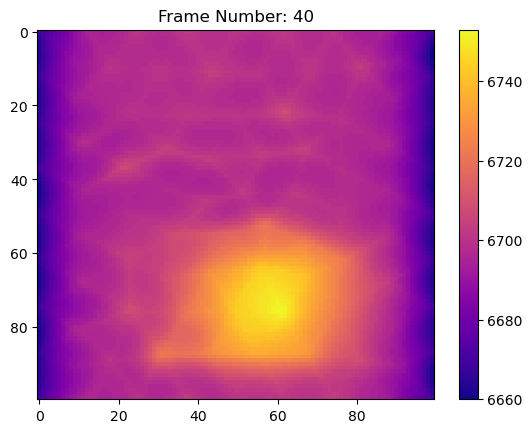

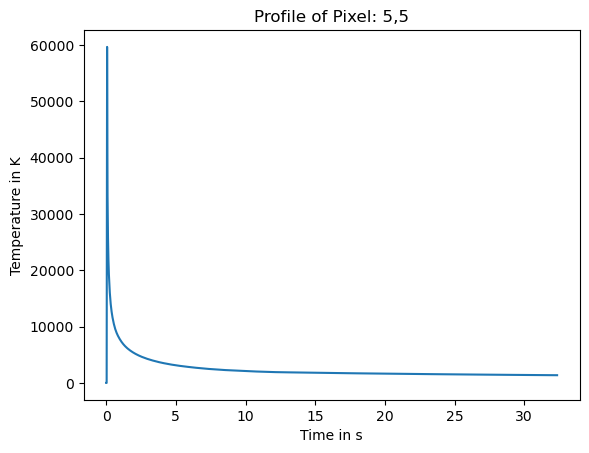

In [15]:
container = reader2[2]

container.show_frame(40)
container.show_pixel_profile(5, 5)  